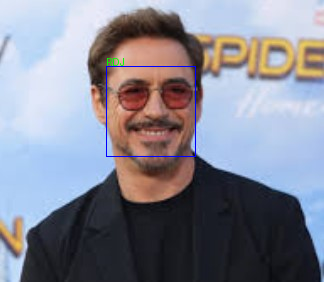

In [4]:
import face_recognition
from PIL import Image, ImageDraw
known_image = face_recognition.load_image_file("known_pic.jpg")
known_face_encoding = face_recognition.face_encodings(known_image)[0]
unknown_image = face_recognition.load_image_file("unknown_pic.jpg")
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces([known_face_encoding], face_encoding)
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
    if matches[0]:
        draw.text((left, top - 10), "RDJ", fill=(0, 255, 0))
del draw
pil_image.save("output_image.jpg")
pil_image.show()
